In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Data'
os.listdir(path)


['ECS7027P Assignment 1 Dataset.zip',
 '__MACOSX',
 'new',
 'sample.jpg',
 'ergasia_MLD_qmul',
 'aligned']

In [ ]:
path = '/content/drive/MyDrive/Data'
os.listdir(path)



directory_to_extract_to = '/content/drive/MyDrive/Data/new'
#for zip in zip_files:
zip_path = '/content/drive/MyDrive/Data/ECS7027P Assignment 1 Dataset.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print('extract', zip_path)
    zip_ref.extractall(directory_to_extract_to)



extract /content/drive/MyDrive/Data/ECS7027P Assignment 1 Dataset.zip


# preparing data

In [ ]:
source_path = '/content/drive/MyDrive/Data/ergasia_MLD_qmul'
counter = 0
for folder in os.listdir(source_path):
  if folder == '.DS_Store':
    continue
  images = os.listdir(os.path.join(source_path, folder))
  print(folder, len(images))
  counter = counter + len(images)


    

FEAR 2985
SURPRISE 7418
SADNESS 13040
HAPPINESS 9113
ANGER 8228
DISGUST 2651
train 6
test 6


In [ ]:
print(counter)

10861


In [ ]:
for image in images:
  filename = os.path.join(source_path, folder, image)
  frame_bgr = cv2.imread(filename)
  print(frame_bgr.shape)
  frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
  break

(128, 128, 3)



shabnam@MacBook-Pro-2 ANGER % ls | wc -l
    8228
shabnam@MacBook-Pro-2 DISGUST % ls | wc -l
    2651
shabnam@MacBook-Pro-2 FEAR % ls | wc -l
    2985
shabnam@MacBook-Pro-2 HAPPINESS % ls | wc -l
    9113
shabnam@MacBook-Pro-2 SADNESS % ls | wc -l
   13040
shabnam@MacBook-Pro-2 SURPRISE % ls | wc -l
    7418

**split data to test and train**

In [ ]:
import os

import numpy as np

import shutil

rootdir= '/content/drive/MyDrive/Data/ergasia_MLD_qmul' #path of the original folder

classes = {'ANGER':0, 'FEAR':1, 'SURPRISE':2,'SADNESS':3, 'HAPPINESS':4, 'DISGUST':5}

for i in classes.keys:

  os.makedirs(rootdir +'/train/' + i)

  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.25

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

TypeError: ignored

# Data Augmentation

In [ ]:
import numpy as np
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import smart_resize
from tqdm import tqdm

classes_index = {'ANGER':0, 'FEAR':1, 'SURPRISE':2,'SADNESS':3, 'HAPPINESS':4, 'DISGUST':5}


data_dir = '/content/drive/MyDrive/Data/ergasia_MLD_qmul/train'
size = (80, 80)

x = []
y = []
for key in tqdm(classes_index.keys()):

    for _file in tqdm(os.listdir(os.path.join(data_dir,key))):
        filename = os.path.join(data_dir, key, _file)
        image = load_img(filename)
        frame_bgr = img_to_array(image)
        ds = smart_resize(frame_bgr, size)
        x.append(ds)
        y.append(classes_index[key])

x = np.array(x)
print(x.shape)
y = np.array(y)
print(y.shape)

with open('x.pkl'.format(key),'wb') as f:
    pickle.dump(x, f)

with open('y.pkl'.format(key),'wb') as f:
    pickle.dump(y, f)
      

100%|██████████| 6/6 [03:56<00:00, 39.49s/it]


(32574, 96, 96, 3)
(32574,)


In [ ]:
import pickle
import numpy as np
from tqdm import tqdm

classes_index = {'ANGER':0, 'FEAR':1, 'SURPRISE':2,'SADNESS':3, 'HAPPINESS':4, 'DISGUST':5}

i=0
for key in tqdm(classes_index.keys()):
  print(key)
  with open('x_{}.pkl'.format(key),'rb') as f:
      temp_x = pickle.load(f)
      print('temp_x',temp_x.shape)

  with open('y_{}.pkl'.format(key),'rb') as f:
      temp_y = pickle.load(f)
      print('temp_y',temp_y.shape)

  if i !=0:
    x = np.insert(x, x.shape[0], temp_x, axis=0)
    y = np.insert(y, y.shape[0], temp_y, axis=0)
    print(x.shape,y.shape)
    
  else:
    x = np.array(temp_x)
    y = np.array(temp_y)
    print(x.shape,y.shape)

  print(x.shape,y.shape)

  i = i +1

  0%|          | 0/2 [00:00<?, ?it/s]

ANGER
temp_x (6171, 128, 128, 3)
temp_y (6171,)


 50%|█████     | 1/2 [00:01<00:01,  1.72s/it]

(6171, 128, 128, 3) (6171,)
(6171, 128, 128, 3) (6171,)
FEAR
temp_x (2238, 128, 128, 3)
temp_y (2238,)


100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

(8409, 128, 128, 3) (8409,)
(8409, 128, 128, 3) (8409,)


In [ ]:
import pickle

with open('x.pkl','rb') as f:
      x = pickle.load(f)
with open('y.pkl','rb') as f:
      y = pickle.load(f)

In [ ]:
print(x.shape)
print(y.shape)
with open('x.pkl'.format(key),'wb') as f:
    pickle.dump(x, f)

with open('y.pkl'.format(key),'wb') as f:
    pickle.dump(y, f)

(8409, 128, 128, 3)
(8409,)


In [ ]:
print(x.shape)
print(y.shape)

(32574, 5, 5, 3)
(32574,)


In [ ]:
print(np.unique(y, return_counts=True))

(array([0, 1, 2, 3, 4, 5]), array([6171, 2238, 5563, 9780, 6834, 1988]))


In [ ]:
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.tensorflow import balanced_batch_generator

class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch

    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

datagen = ImageDataGenerator(rotation_range=90, brightness_range=[0.2,1.0], horizontal_flip = True) # define your data augmentation

bgen = BalancedDataGenerator(x, y, datagen, batch_size=32)
del(x)
steps_per_epoch = bgen.steps_per_epoch
y_gen = [bgen.__getitem__(0)[1] for i in range(steps_per_epoch)]
print(np.unique(y_gen, return_counts=True))

(array([0, 1, 2, 3, 4, 5]), array([9776, 9776, 9773, 9776, 9777, 9778]))


In [ ]:
import os
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm,metrics,preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from collections import defaultdict
import os
import random
import numpy as np
from tqdm import tqdm
import time
import pickle

In [ ]:
cv2.__version__

'4.1.2'

In [ ]:
import tensorflow
import pathlib
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, Dropout, Flatten, LSTM, Activation, MaxPooling2D
from tensorflow.keras.regularizers import l2 as L2_reg
from tensorflow.keras.layers import Conv2D, BatchNormalization, \
    MaxPool2D, GlobalMaxPool2D, Input, Masking, Conv3D, MaxPooling3D, GlobalMaxPool3D
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.compat.v1.keras.backend import set_session 
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
set_session(sess)

In [ ]:
from facial_analysis import FacialImageProcessing
imgProcessing=FacialImageProcessing(False)

Aligned

In [ ]:
import numpy as np
import cv2
import math
from skimage import transform as trans
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : array
        order: {'x1', 'y1', 'x2', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : array
        order: {'x1', 'y1', 'x2', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    return iou

#print(get_iou([10,10,20,20],[15,15,25,25]))

def preprocess(img, bbox=None, landmark=None, **kwargs):
    M = None
    image_size = [224,224]
    src = np.array([
      [30.2946, 51.6963],
      [65.5318, 51.5014],
      [48.0252, 71.7366],
      [33.5493, 92.3655],
      [62.7299, 92.2041] ], dtype=np.float32 )
    if image_size[1]==224:
        src[:,0] += 8.0
    src*=2
    if landmark is not None:
        dst = landmark.astype(np.float32)

        tform = trans.SimilarityTransform()
        #dst=dst[:3]
        #src=src[:3]
        #print(dst.shape,src.shape,dst,src)
        tform.estimate(dst, src)
        M = tform.params[0:2,:]
        #M = cv2.estimateRigidTransform( dst.reshape(1,5,2), src.reshape(1,5,2), False)
        #print(M)

    if M is None:
        if bbox is None: #use center crop
            det = np.zeros(4, dtype=np.int32)
            det[0] = int(img.shape[1]*0.0625)
            det[1] = int(img.shape[0]*0.0625)
            det[2] = img.shape[1] - det[0]
            det[3] = img.shape[0] - det[1]
        else:
              det = bbox
        margin = kwargs.get('margin', 44)
        bb = np.zeros(4, dtype=np.int32)
        bb[0] = np.maximum(det[0]-margin//2, 0)
        bb[1] = np.maximum(det[1]-margin//2, 0)
        bb[2] = np.minimum(det[2]+margin//2, img.shape[1])
        bb[3] = np.minimum(det[3]+margin//2, img.shape[0])
        ret = img[bb[1]:bb[3],bb[0]:bb[2],:]
        if len(image_size)>0:
              ret = cv2.resize(ret, (image_size[1], image_size[0]))
        return ret 
    else: #do align using landmark
        assert len(image_size)==2
        warped = cv2.warpAffine(img,M,(image_size[1],image_size[0]), borderValue = 0.0)
        return warped

In [ ]:
pip uninstall opencv-python

Found existing installation: opencv-python 4.1.2.30
Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
pip install opencv-python==3.4.8.29

example

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


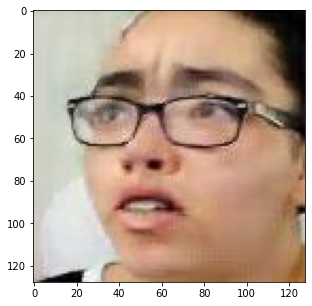

<Figure size 360x360 with 0 Axes>

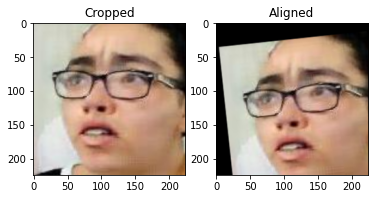

In [ ]:
import matplotlib.pyplot as plt
fpath='/content/drive/MyDrive/Data/sample.jpg'
#fpath='/home/HDD6TB/datasets/emotions/EmotiW/AFEW/val/AlignedFaces_LBPTOP_Points_Val/frames/010255520/017.png'
#fpath='/home/HDD6TB/datasets/emotions/EmotiW/AFEW/val/AlignedFaces_LBPTOP_Points_Val/frames/012705800/030.png'
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    #face_img=frame[y1:y2,x1:x2,:]

    #face_img=extract_image_chip(frame,p)
    p = p.reshape((2,5)).T
        
    plt.figure(figsize=(5, 5))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    face_img=preprocess(frame,box,None) #p)
    ax1.set_title('Cropped')
    ax1.imshow(face_img)
    
    face_img=preprocess(frame,box,p)
    ax2.set_title('Aligned')
    ax2.imshow(face_img)

In [ ]:
def save_aligned_faces(source_path,save_path):
    if not os.path.exists(save_path):
        os.mkdir(save_path)

    for folder in tqdm(os.listdir(source_path)):
        if not os.path.exists(os.path.join(save_path, folder)):
            #os.mkdir(os.path.join(save_path, folder))

            prev_b = None
            counter = 0
            missed_counter = 0
            success_counter = 0
            for image in sorted(os.listdir(os.path.join(source_path, folder))):
                filename = os.path.join(source_path, folder, image)
                frame = cv2.imread(filename)
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                bounding_boxes, points = imgProcessing.detect_faces(frame)
                points = points.T

                best_ind=None
                if len(bounding_boxes)==0:
                    print('No faces found for ',filename)
                    missed_counter+=1
                    counter+=1
                    if prev_b is None or counter>3:
                        continue
                    else:
                        b=prev_b
                elif len(bounding_boxes)>1:
                    print('Too many faces (',len(bounding_boxes),') found for ',filename)
                    if prev_b is None:
                        #continue
                        best_ind=0
                        b=[int(bi) for bi in bounding_boxes[best_ind]]
                        counter=0
                    else:
                        best_iou=0
                        for i in range(len(bounding_boxes)):
                            iou=get_iou(bounding_boxes[i],prev_b)
                            if iou>best_iou:
                                best_iou=iou
                                best_ind=i
                        if best_iou>0:
                            b=[int(bi) for bi in bounding_boxes[best_ind]]
                            print('best_iou (',best_iou,') best_bb ',bounding_boxes[best_ind])
                        else:
                            #continue
                            best_ind=0
                            b=[int(bi) for bi in bounding_boxes[best_ind]]
                            counter=0
                else:
                    best_ind=0
                    b=[int(bi) for bi in bounding_boxes[best_ind]]
                    counter=0
                prev_b=b

                if True:
                    p=None
                    if best_ind is not None:
                        p=points[best_ind]
                        if True: #not USE_RETINA_FACE:
                            p = p.reshape((2,5)).T
                    face_img=preprocess(frame,b,None) #p)
                else:
                    x1,y1,x2,y2=b[0:4]
                    face_img=frame[y1:y2,x1:x2,:]
                if np.prod(face_img.shape)==0:
                    print('Empty face ',b,' found for ',filename)
                    continue
                success_counter+=1
                #cv2.imwrite(os.path.join(save_path, folder, image), cv2.cvtColor(face_img, cv2.COLOR_RGB2BGR)) 
        print(folder, missed_counter)
        print(folder, success_counter)
#aligned
#save_aligned_faces(os.path.join(DATA_DIR,'val/AlignedFaces_LBPTOP_Points_Val/frames/'),os.path.join(DATA_DIR,'val/AlignedFaces_LBPTOP_Points_Val/frames_mtcnn_cropped/'))
#save_aligned_faces(os.path.join(DATA_DIR,'train/AlignedFaces_LBPTOP_Points/frames/'),os.path.join(DATA_DIR,'train/AlignedFaces_LBPTOP_Points/frames_mtcnn_cropped/'))

In [ ]:
import os
from tqdm import tqdm
data_dir = '/content/drive/MyDrive/Data/ergasia_MLD_qmul/train'
dest = '/content/drive/MyDrive/Data/aligned'

save_aligned_faces(data_dir, dest)